# Board Level Strategic Insight Request
## Data Analyst: Jane Rose Salazar
## Date of Request: September 26, 2025

Scenario

A mid-sized financial institution has been actively expanding its personal loan portfolio. However, recent shifts in customer behavior and credit risk profiles have prompted the Board of Directors to revisit the underlying factors influencing loan approvals and amounts granted. The board is particularly concerned with credit risk, profitability, and data-driven decision-making.

During a quarterly strategy meeting, the Chief Risk Officer (CRO) presents a dashboard highlighting inconsistencies in the average loan amounts issued across customer segments. Some applicants with moderate income and lower credit scores are receiving higher-than-expected loan amounts, while more qualified applicants appear to be under-leveraged.

In response, the Chairperson of the Board raises a crucial question:

"Among all the customer attributes we’ve been collecting—like income, credit score, employment history, age, debt-to-income ratio, and education level—can we clearly identify which of these factors have the strongest statistical relationship with the loan amount issued?"

The board mandates the Data Analytics Team to conduct an immediate correlation analysis to:

1. Identify which factors most strongly drive loan amounts.

2. Distinguish between statistically significant vs. insignificant variables.

3. Support future decisions about automating loan approvals, tightening risk thresholds, or tailoring products to specific customer profiles.

Create a Business Analytics Report that address the request of the board.

**1. Loading the Data**

This shows us the structure of the dataset and confirms the columns we’ll analyze.

In [8]:
import pandas as pd

# Load dataset
df = pd.read_excel("HypotheticalLoansData.xlsx")

# Preview first 5 rows
df.head()


,Income,CreditScore,EmploymentYears,DebtToIncome,Age,EducationLevel,LoanAmount
0,67450.71,746.31,22,0.27,48,Bachelor,105119.57
1,57926.04,795.47,11,0.38,59,Bachelor,104818.75
2,69715.33,630.07,16,0.37,26,Bachelor,99397.74
3,82845.45,728.15,7,0.23,29,High School,99163.53
4,56487.70,667.47,10,0.38,40,High School,80141.29


**2. Descriptive Statistics**

2.1 Summary Statistics

In [10]:
desc = df.describe().T
desc['median'] = df.drop('EducationLevel', axis=1).median()
desc['IQR'] = df.drop('EducationLevel', axis=1).quantile(0.75) - df.drop('EducationLevel', axis=1).quantile(0.25)
desc

,count,mean,std,min,25%,50%,75%,max,median,IQR
Income,500.0,60102.56978,14718.798391,11380.99,49495.3900,60191.96,69551.7525,117790.97,60191.96,20056.3625
CreditScore,500.0,701.59120,48.900041,565.16,670.2350,701.43,732.5625,831.62,701.43,62.3275
EmploymentYears,500.0,14.31200,8.517026,0.00,7.0000,14.00,22.0000,29.00,14.00,15.0000
DebtToIncome,500.0,0.29890,0.096851,0.01,0.2300,0.30,0.3600,0.57,0.30,0.1300
Age,500.0,42.54400,12.714219,21.00,31.7500,42.50,54.0000,64.00,42.50,22.2500
LoanAmount,500.0,87561.53296,13021.297761,53960.78,78285.4825,87579.97,96888.5175,119076.87,87579.97,18603.0350


**Key Findings:**


Income: Average ₱60,103.

Credit Score: Average 702 (healthy, near “good” category).

Employment Years: Average 14 years.

Debt-to-Income Ratio: Average 30%.

Loan Amount: Average ₱87,562, ranging roughly ₱78k–₱97k.


2.2 Frequency Distribution (Education Level)

In [11]:
df['EducationLevel'].value_counts()


,count
EducationLevel,
Bachelor,196
High School,143
Master,108
PhD,53


**3. Correlation Analysis**

Since correlation works with numbers, we encode Education Level:

In [12]:
mapping = {'High School':1, 'Bachelor':2, 'Master':3, 'PhD':4}
df['EducationLevel_num'] = df['EducationLevel'].map(mapping)


**3.1 Compute Correlations**

In [13]:
from scipy import stats

predictors = ['Income','CreditScore','EmploymentYears','DebtToIncome','Age','EducationLevel_num']
target = 'LoanAmount'

results = []
for col in predictors:
    pearson_r, pearson_p = stats.pearsonr(df[col], df[target])
    spearman_r, spearman_p = stats.spearmanr(df[col], df[target])
    kendall_r, kendall_p = stats.kendalltau(df[col], df[target])
    results.append({
        'Predictor': col,
        'Pearson_r': pearson_r, 'Pearson_p': pearson_p,
        'Spearman_r': spearman_r, 'Spearman_p': spearman_p,
        'Kendall_tau': kendall_r, 'Kendall_p': kendall_p
    })

results_df = pd.DataFrame(results)
results_df.sort_values('Pearson_r', key=abs, ascending=False)


,Predictor,Pearson_r,Pearson_p,Spearman_r,Spearman_p,Kendall_tau,Kendall_p
1,CreditScore,0.343985,2.466328e-15,0.340454,4.925163e-15,0.233034,6.772014e-15
2,EmploymentYears,0.308620,1.705587e-12,0.301337,5.908019e-12,0.204530,1.710030e-11
0,Income,0.240972,4.885891e-08,0.226108,3.228689e-07,0.150493,4.902791e-07
3,DebtToIncome,-0.211895,1.747215e-06,-0.198562,7.695095e-06,-0.137438,5.908173e-06
4,Age,-0.034823,4.371809e-01,-0.037659,4.007585e-01,-0.026047,3.892967e-01
5,EducationLevel_num,0.001614,9.712737e-01,0.012734,7.763838e-01,0.009669,7.749237e-01




**Correlation Results**

* Credit Score – higher score → higher loan (moderate, significant)

* Employment Years – more years → higher loan (moderate, significant)

* Income – higher income → slightly higher loan (weak-to-moderate, significant)

* Debt-to-Income – higher debt → lower loan (weak-to-moderate, significant)

* Age – no real effect on loan size (not significant)

* Education Level – no effect on loan size (not significant)




**4. Visualizing Relationships**

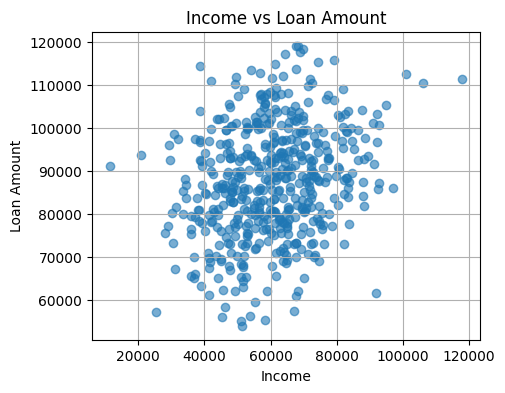

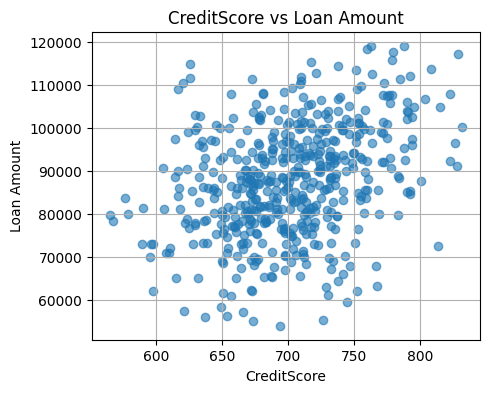

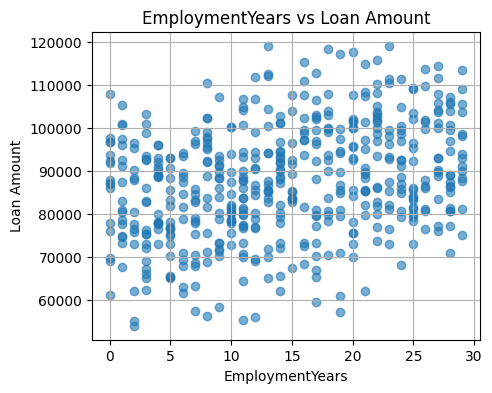

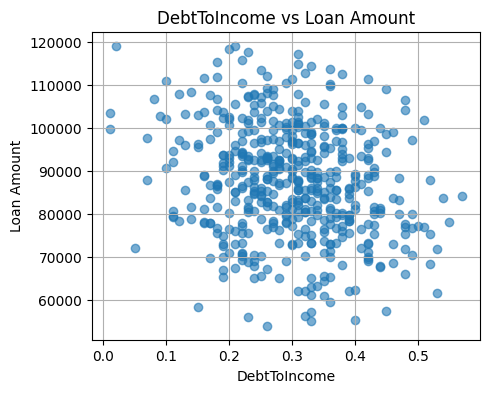

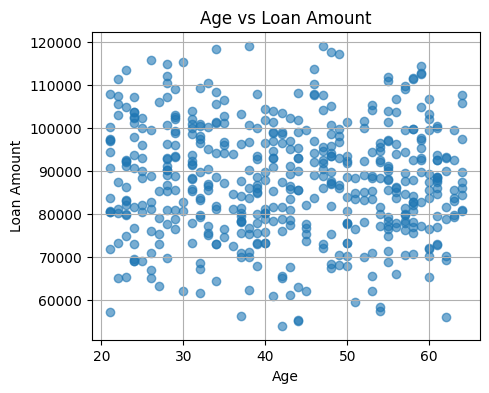

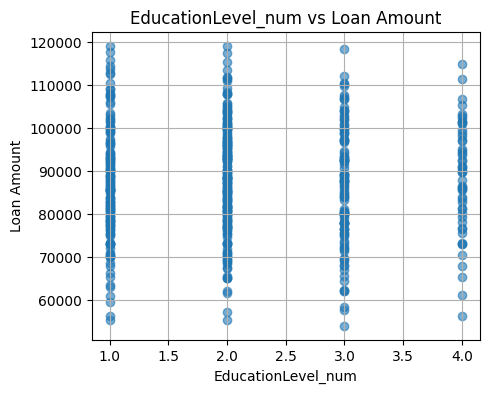

In [14]:
import matplotlib.pyplot as plt

for col in predictors:
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df[target], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel("Loan Amount")
    plt.title(f"{col} vs Loan Amount")
    plt.grid(True)
    plt.show()


**Visual Insights:**

* Loan amounts trend upward with Credit Score and

* Employment Years.

* Loan amounts decrease as Debt-to-Income rises.

* Age and Education Level show no clear trend.

**5. Insights for the Board**

**Key Drivers of Loan Amounts**

* The biggest factors that influence loan size are Credit Score and Years of Employment.

* Income helps explain loan amounts, but not as strongly.

* Debt-to-Income has the opposite effect — the more debt a person already has, the smaller the loan they tend to receive.

* Age and Education Level do not play a meaningful role.

**Statistical Significance**

* Matters: Credit Score, Employment Years, Income, Debt-to-Income.

* Doesn’t Matter: Age, Education Level.

**Business Recommendations**

* Automation – Focus on Credit Score and Employment History when designing automated approval systems.

* Risk Management – Use Debt-to-Income as a control; those with high debt should be flagged or given smaller loans.

* Product Tailoring – Income can guide product design, offering larger loans to higher earners with acceptable risk.

* Fairness – Avoid using Age and Education Level, since they don’t add value and could cause bias.



**Final Summary**

This report shows that:

* Credit Score and Employment History are the strongest drivers of loan size.

* Income and Debt-to-Income still matter, but less strongly.

* Age and Education Level don’t affect loan approvals.

* These findings directly support automation, better risk thresholds, and product design.